# Normalization

## Case and whitespace

We'll start with an easy one: normalising cases. First, let's see the collation output without normalization:

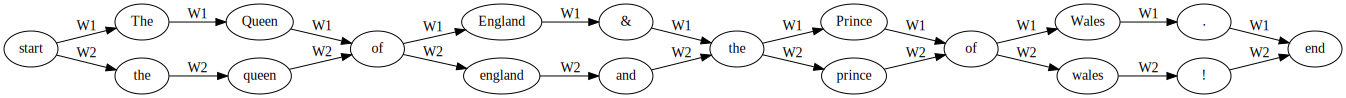

None


In [1]:
from collatex import*
collation_object = Collation()
collation_object.add_plain_witness('W1', 'The Queen of England & the Prince of Wales.')
collation_object.add_plain_witness('W2', 'the queen of england and the prince of wales!')
result = collate(collation_object, output='svg_simple', segmentation=False)
print(result)

As you can see, the tokens `Queen` in witness 1 and `queen` in witness 2 are *not* considered matches. 

### 1. Manual normalization:
Let's say we'd like the alignment algorithm to ignore the cases of the tokens, so that `queen` will be matched with `Queen`. You can of course normalize the original witnesses. However, CollateX also has a special funtionality for normalization: for each token, CollateX creates two properties: a `t` property for the original token and an `n` property for a normalized form of the original token. If you don't supply an `n` property, CollateX automatically copies the value of the `t` property in the `n` property.

You can think of the `n` property as a _shadow_ copy of the token: the user will typically not get to see it, but the aligner will only look at the normalized form during the alignment process.

The original token `t` and the normalized form `n` are expressed in JSON. You can put whatever you want in the `n` property:

In [ ]:
from collatex import *
import json
norm_collation_obj = Collation()
json_input = """{
"witnesses": [
{"id": "W1", "tokens": [
{"t": "The", "n": "the"},
{"t": "Queen", "n": "queen"},
{"t":"of", "n": "of"}, 
{"t":"England", "n": "england"},
{"t":"&", "n":"and"},
{"t":"the", "n": "the"},
{"t":"Prince", "n": "prince"},
{"t":"of", "n": "of"},
{"t":"Wales", "n": "wales"},
{"t":".", "n": "!"}
]
},
{"id": "W2", "tokens": [
{"t": "the", "n": "the"},
{"t": "queen", "n": "queen"},
{"t":"of", "n": "of"}, 
{"t":"england", "n": "england"},
{"t":"and", "n":"and"},
{"t":"the", "n": "the"},
{"t":"prince", "n": "prince"},
{"t":"of", "n": "of"},
{"t":"wales", "n": "wales"},
{"t":"!", "n": "!"}
]
}
]
}"""
collate(json.loads(json_input), segmentation=False, output='html2')

Obviously, this manual entry of shadow tokens in JSON is time-consuming and doesn't scale for a typical project.

### 2. Preprocess the witnesses
We can also preprocess the witnesses to create the dictionary structure and feed that to CollateX.

In [ ]:
import re
from collatex import *

#create the witnesses:
wA = "A", "The Queen of England, and the Prince (of Wales)."
wB = "B", "the queen of england with the prince of wales!"

collation = Collation()
def processToken(inputText): 
    return {"t": inputText, "n": re.sub('\s+$', '', inputText.lower())}
def processWitness(inputText):
    siglum, rdg = inputText
    return {"id": siglum, "tokens": \
           [processToken(token) for token in re.findall(r'\w+\s*|\W+', rdg)]}
witnesses = [wA,wB]
collation = {"witnesses": [processWitness(witness) for witness in witnesses]}
output = collate(collation, segmentation=False, output="svg_simple")
print(output)

## Whitespace

Who can tell with which function we have taken care of any trailing whitespace in the input witnesses?

In [ ]:
print(collation)

## Punctuaction normalization

Some researchers are not interested in variation that only affects punctuation. Use the code above and change the normalization so that the witnesses are aligned on words only, and punctuation is ignored.  

Hint: use regular expressions to strip the punctuation from the "n" properties of the tokens. You can find a regex cheat sheet [here](https://www.dataquest.io/wp-content/uploads/2019/03/python-regular-expressions-cheat-sheet.pdf) and practice [here](https://www.dataquest.io/wp-content/uploads/2019/03/python-regular-expressions-cheat-sheet.pdf).

## Further reading

If you're interested in the theoretical side of this, I can highly recommend [a recent article](http://www.digitalhumanities.org/dhq/vol/14/3/000489/000489.html) by David J. Birnbaum and Elena Spadini on the role of normalization in the collation process.

They state:

### "Normalization, in a nutshell, makes it possible to identify phenomena on multiple orthographic and linguistic levels and use them to create surrogates for the literal word tokens that then shape and interpret the results of collation, tacitly neutralizing and ignoring other distinctions that are present in the literal tokens."